In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

Import and prepare database

In [2]:
sms = pd.read_csv("spam.csv", engine='python')

In [3]:
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
sms = sms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

sms.columns = ['label','messages']
sms.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


    divide into ham and spam

In [5]:
ham = sms[sms['label'] == 'ham']
spam = sms[sms['label'] == 'spam']

remove stopwords

In [6]:
stop = stopwords.words('english')
import string

def txtprocess(messages):
    
    nopunc = [char for char in messages if char not in string.punctuation] 
    
    nopunc = ''.join(nopunc)

    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in stop])

In [7]:
ham['processed'] = ham.messages.apply(txtprocess)
spam['processed'] = spam.messages.apply(txtprocess)

C:\Users\public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\public\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


create worpus of words tokenized

In [8]:
word_spam = ''.join(spam['processed'])
word_ham = ''.join(ham['processed'])

In [9]:
tokenized_word_spam=word_tokenize(word_spam)
tokenized_word_ham=word_tokenize(word_ham)

wordcloud

In [10]:
stopword = set(STOPWORDS)

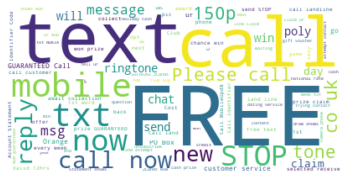

In [11]:
text = ''.join(spam['messages'])
wordcloud = WordCloud(stopwords=stopword,max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

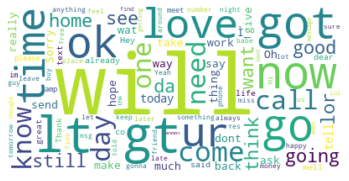

In [12]:
text = ''.join(ham['messages'])
wordcloud = WordCloud(stopwords=stopword,max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

plot

In [13]:
fdist_spam = FreqDist(tokenized_word_spam)
fdist_ham = FreqDist(tokenized_word_ham)

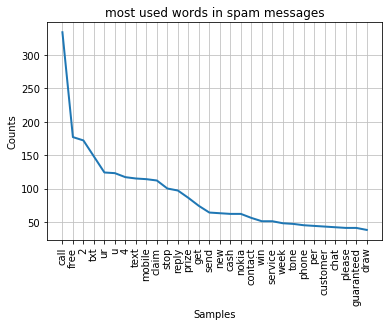

In [14]:
fdist_spam.plot(30,cumulative=False, title = 'most used words in spam messages')
plt.show()

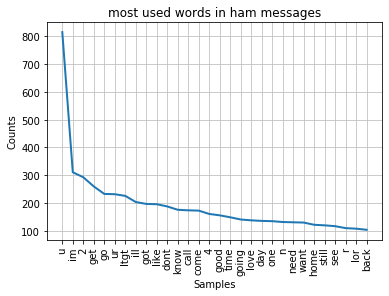

In [15]:
fdist_ham.plot(30,cumulative=False, title = 'most used words in ham messages')
plt.show()